In [275]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [277]:
%autoreload
from pipeline import Pipeline, BuilingIdsEnum
from utils import plot_energy_usage, ColumnParam
pipe = Pipeline()

In [278]:
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
print("columns:", list(main_df.columns))
# ['timestamp', 'value_import', 'property_id', 'building', 'area', 'value_export', 'solar_consumption', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation', 'spot_price_nok']


In [279]:
main_df 

,timestamp,value_import,value_export,solar_consumption,net_consumption,net_consumption_per_sqm,predicted_consumption,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok
0,2023-07-01 00:00:00,27.5,0.0,0.000000,27.500000,0.022936,40.197586,main building,10724,1199,13.6,1.6,251.5,0.5,0.0,1.137242
1,2023-07-01 01:00:00,27.1,0.0,0.000000,27.100000,0.022602,39.341590,main building,10724,1199,13.2,2.0,246.5,0.4,0.0,1.075944
2,2023-07-01 02:00:00,26.8,0.0,0.000000,26.800000,0.022352,26.925701,main building,10724,1199,12.3,1.6,260.4,0.3,0.0,0.970594
3,2023-07-01 03:00:00,25.9,0.0,0.000000,25.900000,0.021601,25.161346,main building,10724,1199,11.9,0.6,285.0,0.9,0.0,0.908986
4,2023-07-01 04:00:00,26.4,0.0,0.000000,26.400000,0.022018,28.009222,main building,10724,1199,11.9,0.2,295.8,0.8,0.0,0.765118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2024-09-03 18:00:00,37.4,0.0,0.184148,37.584148,0.031346,42.476562,main building,10724,1199,17.8,2.5,140.8,1.0,1.4,0.662337
10339,2024-09-03 19:00:00,29.2,0.0,0.157455,29.357455,0.024485,41.309350,main building,10724,1199,17.8,1.8,112.6,1.0,2.5,0.664547
10340,2024-09-03 20:00:00,28.9,0.0,0.017115,28.917115,0.024118,41.650190,main building,10724,1199,17.7,1.1,75.1,1.0,2.6,0.663151
10341,2024-09-03 21:00:00,35.0,0.0,0.018016,35.018016,0.029206,40.362083,main building,10724,1199,18.0,3.4,111.0,1.0,2.9,0.662221


In [280]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="d")

merged_df = merged_df.iloc[1:-1]
plot_energy_usage(merged_df, cols,
                    titel="Daily Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [281]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="w")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="Weekly Energy Consumption Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    # dark_mode=True,
                    )

In [282]:
merged_df, cols =pipe.select_and_merge_datasets(["net_consumption"], periode="m")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="monthly Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [283]:
merged_df, cols = pipe.select_and_merge_datasets(cols=['net_consumption_per_sqm'], periode="d")
    
plot_energy_usage(merged_df, cols,
                    titel="Daily Energy Usage Comparison per sqm",
                    yaxis_title="Energy [kWh per sqm]",
                    tozeroy=False,
                    dark_mode=True,
                    )

## Renewable Energy Impact

In [284]:
daily_main = pipe.get_weekly_consumption(BuilingIdsEnum.MAIN)
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("value_export", "Energy Export"),
    ColumnParam("solar_consumption", "Solar Consumption"),
    # net
    ColumnParam("net_consumption", "Net Consumption"),
]
# trim
daily_main = daily_main.iloc[1:-1]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage Main Building",
                  yaxis_title="Energy [kWh]",
                  tozeroy=False,
                  )

In [285]:
# make a grap with 
daily_main = pipe.get_weekly_consumption(BuilingIdsEnum.MAIN)
# trim
daily_main = daily_main.iloc[1:-1]
# print net consumption and import together with torzey
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("net_consumption", "Net Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                    titel="Energy Consumption vs Import For The Main Building",
                    yaxis_title="Energy [kWh]",
                    tozeroy=True,
                    )

In [286]:
# get main building data
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
# cols: spot_price_nok, solar_consumption
# calculate the value of the solar energy
# plot the solar value
# aggregated by day
main_df["solar_value"] = main_df["solar_consumption"] * main_df["spot_price_nok"]
# set index
main_df.set_index("timestamp", inplace=True)
monthly_solar_money = main_df.resample("ME").sum()
monthly_solar_money.reset_index(inplace=True)

plot_cols =[
    ColumnParam("solar_value", "Solar Value"),
]
plot_energy_usage(monthly_solar_money, plot_cols,
                    titel="Money saved by solar panels",
                    yaxis_title="Value [NOK]",
                    tozeroy=False,
                    )
# print the avg money saved each month
print(f"average money saved by solar panels each month: {monthly_solar_money['solar_value'].mean():.2f} NOK")

# two desimals
print(f"total money saved by solar panels: {monthly_solar_money['solar_value'].sum():.2f} NOK")



average money saved by solar panels each month: 2508.04 NOK
total money saved by solar panels: 37620.58 NOK


### Prediction interpretation
- 

## Feature Analysis
Objective of the projects is to map out the advantigaed of the main building's energy consumtion vs the rest of the buildings.
Main building data columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

Builing A,B,C ['timestamp', 'value_import', 'net_consumption', 'net_consumption_per_sqm', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

example use:

monthly_a = pipe.get_monthly_consumption(BuilingIdsEnum.A)

for eks
daily_main = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    # ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage actual vs predicted",
                  yaxis_title="Energy [kWh]",
                  tozeroy=True,
                  )

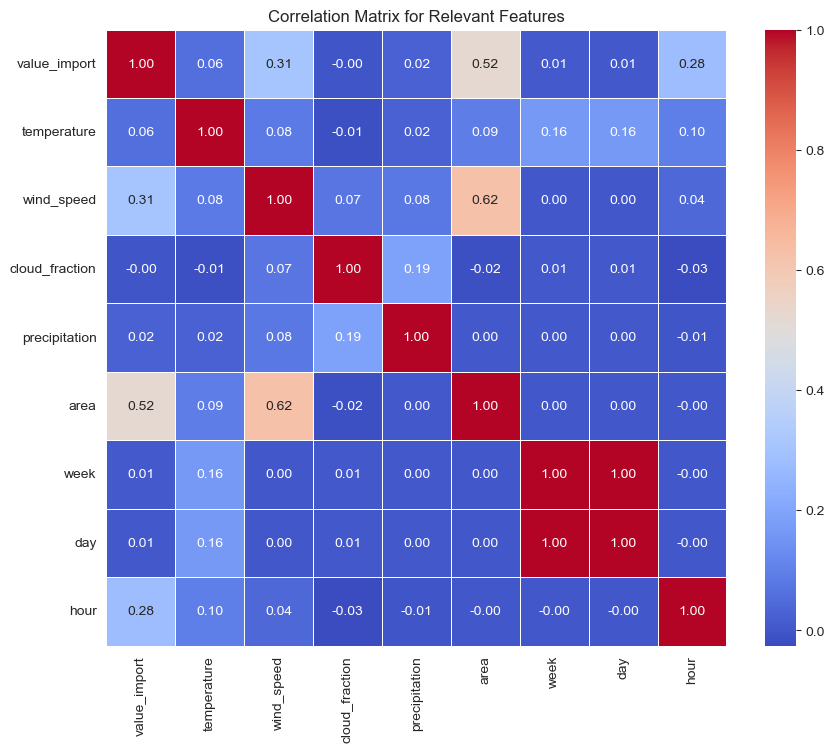

In [287]:
df_a = pipe.get_data(BuilingIdsEnum.A)
df_b = pipe.get_data(BuilingIdsEnum.B)
df_c = pipe.get_data(BuilingIdsEnum.C)

merged_df = pd.concat([df_a, df_b, df_c])
# Add 'week' and 'day' columns
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['day'] = merged_df['timestamp'].dt.dayofyear
merged_df['week'] = merged_df['timestamp'].dt.isocalendar().week

relevant_columns = [
    'value_import', 
    'temperature', 'wind_speed', 
    'cloud_fraction', 'precipitation',
    'area', "week", "day", "hour"
]
df_corr = merged_df[relevant_columns]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Relevant Features')
plt.show()


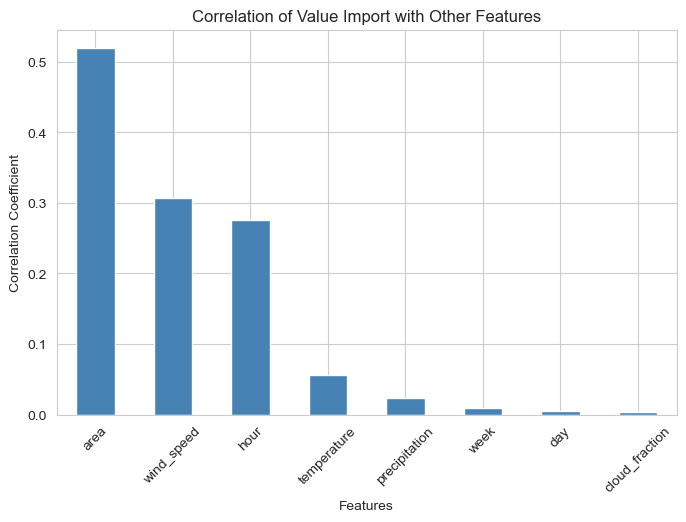

In [288]:
# Extract correlations of 'value_import' with other features and take the absolute values
value_import_corr = corr_matrix['value_import'].abs().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
value_import_corr.drop('value_import').plot(kind='bar', color='steelblue')
plt.title('Correlation of Value Import with Other Features')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.savefig(f'images/correlation_bar_plot_{"all_datasets"}.png')
plt.show()



### key takeaways:

- **Building Size (Area) and Energy Import:** The correlation matrix shows a strong relationship between `area` and `value_import`, indicating that larger buildings generally require more energy. This is expected, as larger spaces have greater heating, cooling, and operational demands.
- **Wind Speed Influence:** The moderate positive correlation between `wind_speed` and `value_import` suggests that wind may have a tangible impact on energy use. This seems odd and should be investigated further.

- **Time-Based Influence:** The relatively weak correlation between `value_import` and time-based features (week, day) suggests minimal impact, while the moderate correlation with `hour` indicates potential fluctuations in energy consumption over the course of a day.

- **Wind and Area Interaction:** The correlation between `wind_speed` and `area` does not make sense, even though it appears to be strong.

### Next up:

- **Further Analysis on Hourly Patterns:** Since there is a noticeable correlation with `hour`, it may be valuable to explore energy consumption patterns across different hours of the day to identify peak usage periods.
- **Investigate the correlation of feature for the different buildings:** The correlation matrix should be analyzed for each building to identify unique relationships and potential areas for optimization.

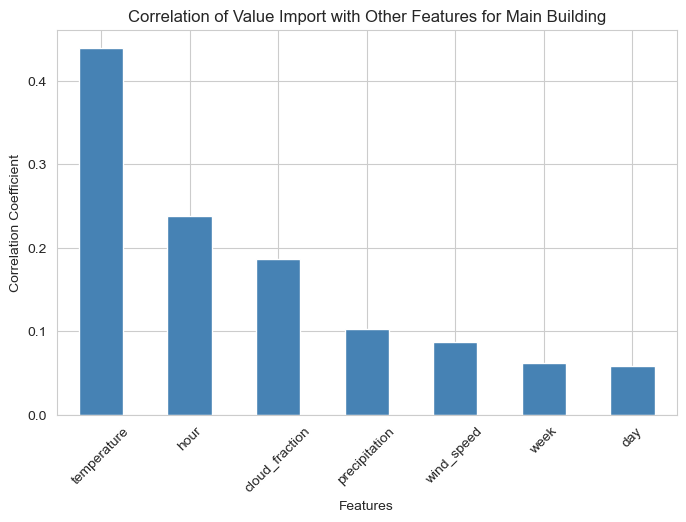

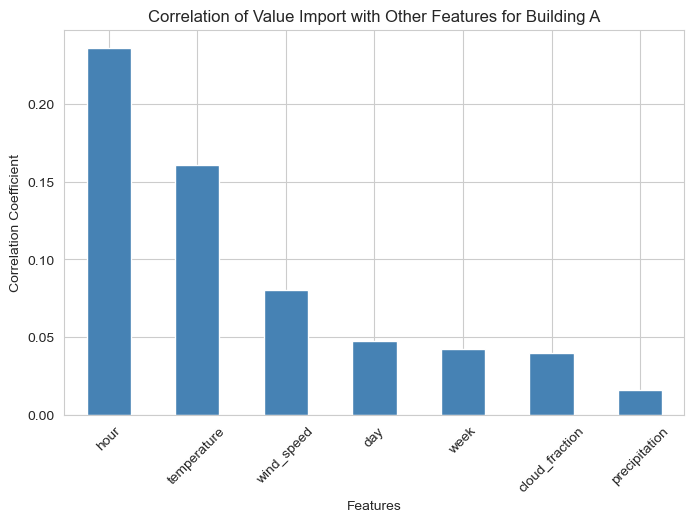

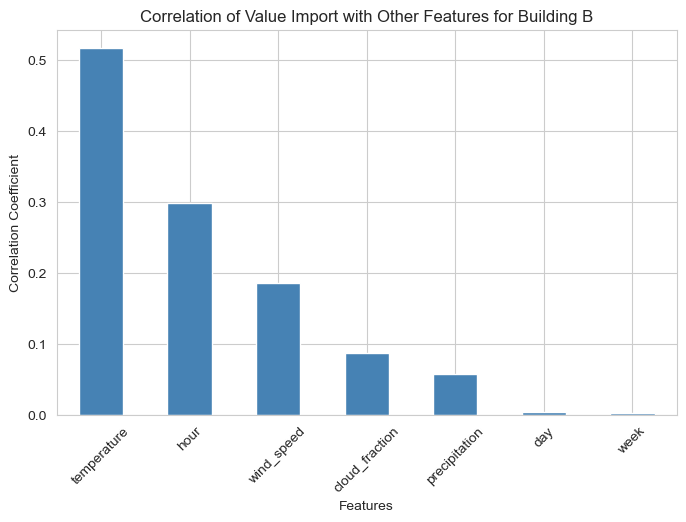

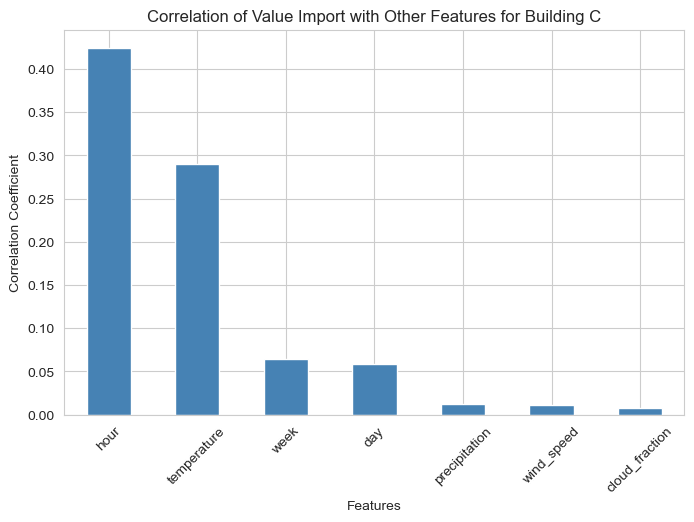

In [289]:
df_a = pipe.get_data(BuilingIdsEnum.A)
df_b = pipe.get_data(BuilingIdsEnum.B)
df_c = pipe.get_data(BuilingIdsEnum.C)
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
dataframes = {
    'Main Building': main_df,
    'Building A': df_a,
    'Building B': df_b,
    'Building C': df_c,
}

# Relevant columns for correlation analysis
relevant_columns = [
    'value_import', 
    # 'total_consumption'
    'temperature', 'wind_speed', 
    'cloud_fraction', 'precipitation',
]

# Loop through each dataframe and create correlation matrix
for name, df in dataframes.items():
    # Ensure 'timestamp' is in datetime format
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Add 'hour', 'day', and 'week' columns
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.dayofyear
    df['week'] = df['timestamp'].dt.isocalendar().week

    # Select relevant columns for correlation
    df_relevant = df[relevant_columns + ['hour', 'day', 'week']]

    # Compute the correlation matrix
    corr_matrix = df_relevant.corr()
    # Extract correlations of 'value_import' with other features and take the absolute values
    value_import_corr = corr_matrix['value_import'].abs().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    value_import_corr.drop('value_import').plot(kind='bar', color='steelblue')
    plt.title('Correlation of Value Import with Other Features for ' + name)
    plt.ylabel('Correlation Coefficient')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.savefig(f'images/correlation_bar_plot_{name}.png')
    plt.show()


    # # Plot the heatmap
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    # plt.title(f'Correlation Matrix for {name}')
    # plt.show()


### Correlation Matrix Interpretation
The hour and temperature are the features most relevant for the energy consumption of the buildings. 
However the buildings have different correlations with the features. The A building has the least correlation with the features. The B building has the correlation most similar to the main building. The C building has the most correlation with hourly usage while builing B has the highest correlation with temperature.

Perhaps the data from the B building is best for predicting the main building's energy consumption. Maybe it should be weighted more?


## Anomaly Detection

In [290]:
daily_a = pipe.get_daily_consumption(BuilingIdsEnum.A)
# select juli 2024
daily_a_selected = daily_a[(daily_a['timestamp'] >= '2024-01-01') & (daily_a['timestamp'] < '2024-08-01')]
plot_cols =[
    ColumnParam("value_import", "Energy Import"),
]
plot_energy_usage(daily_a_selected, plot_cols,
                  titel="Daily Energy Usage A Building",
                  yaxis_title="Energy [kWh]",
                  tozeroy=False,
                  )

### Anomaly Detection Results
There seems to be something off in the start of juli 2024. This could be due to a data error or a real anomaly. We want to avoid using this data when training the model.

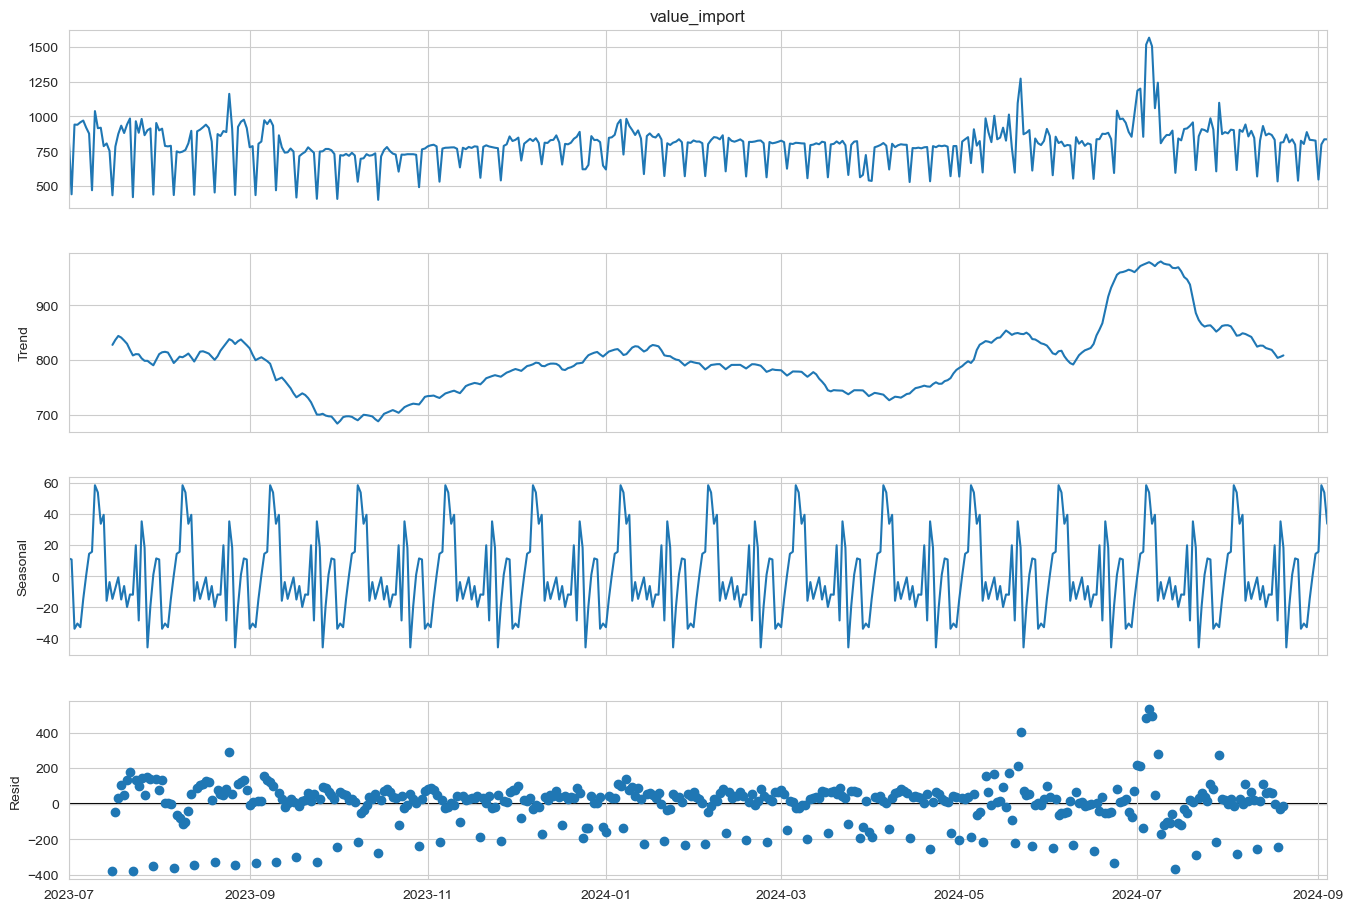

In [291]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
daily_a.set_index('timestamp', inplace=True)
decomposition = seasonal_decompose(daily_a['value_import'], model='additive', period=30)  # Assuming monthly seasonality
daily_a.reset_index(inplace=True)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()


In [292]:
import numpy as np
from scipy import stats

# Calculate Z-scores
daily_a['z_score'] = np.abs(stats.zscore(daily_a['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_a['anomaly_z'] = daily_a['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_a['anomaly_z'].sum()}")

# show anonomalies
anonomalies_df = daily_a[daily_a['anomaly_z']]
anonomalies_df

print("dates")
print(anonomalies_df['timestamp'])

Number of anomalies detected by Z-Score: 5
dates
326   2024-05-22
369   2024-07-04
370   2024-07-05
371   2024-07-06
373   2024-07-08
Name: timestamp, dtype: datetime64[ns]


Lets look at dataset b, c and main  as well and identify if the anomaly is present in all datasets defined by the z-score.

In [293]:
daily_main_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.MAIN)
daily_main_anomalies['z_score'] = np.abs(stats.zscore(daily_main_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_main_anomalies['anomaly_z'] = daily_main_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_main_anomalies['anomaly_z'].sum()}")



Number of anomalies detected by Z-Score: 0


In [294]:
daily_b_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.B)
daily_b_anomalies['z_score'] = np.abs(stats.zscore(daily_b_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_b_anomalies['anomaly_z'] = daily_b_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_b_anomalies['anomaly_z'].sum()}")
anonomalies_df = daily_b_anomalies[daily_b_anomalies['anomaly_z']]
anonomalies_df

# print the dates 
print("anonomalies dates:")
print((anonomalies_df['timestamp']))

Number of anomalies detected by Z-Score: 5
anonomalies dates:
188   2024-01-05
189   2024-01-06
190   2024-01-07
191   2024-01-08
198   2024-01-15
Name: timestamp, dtype: datetime64[ns]


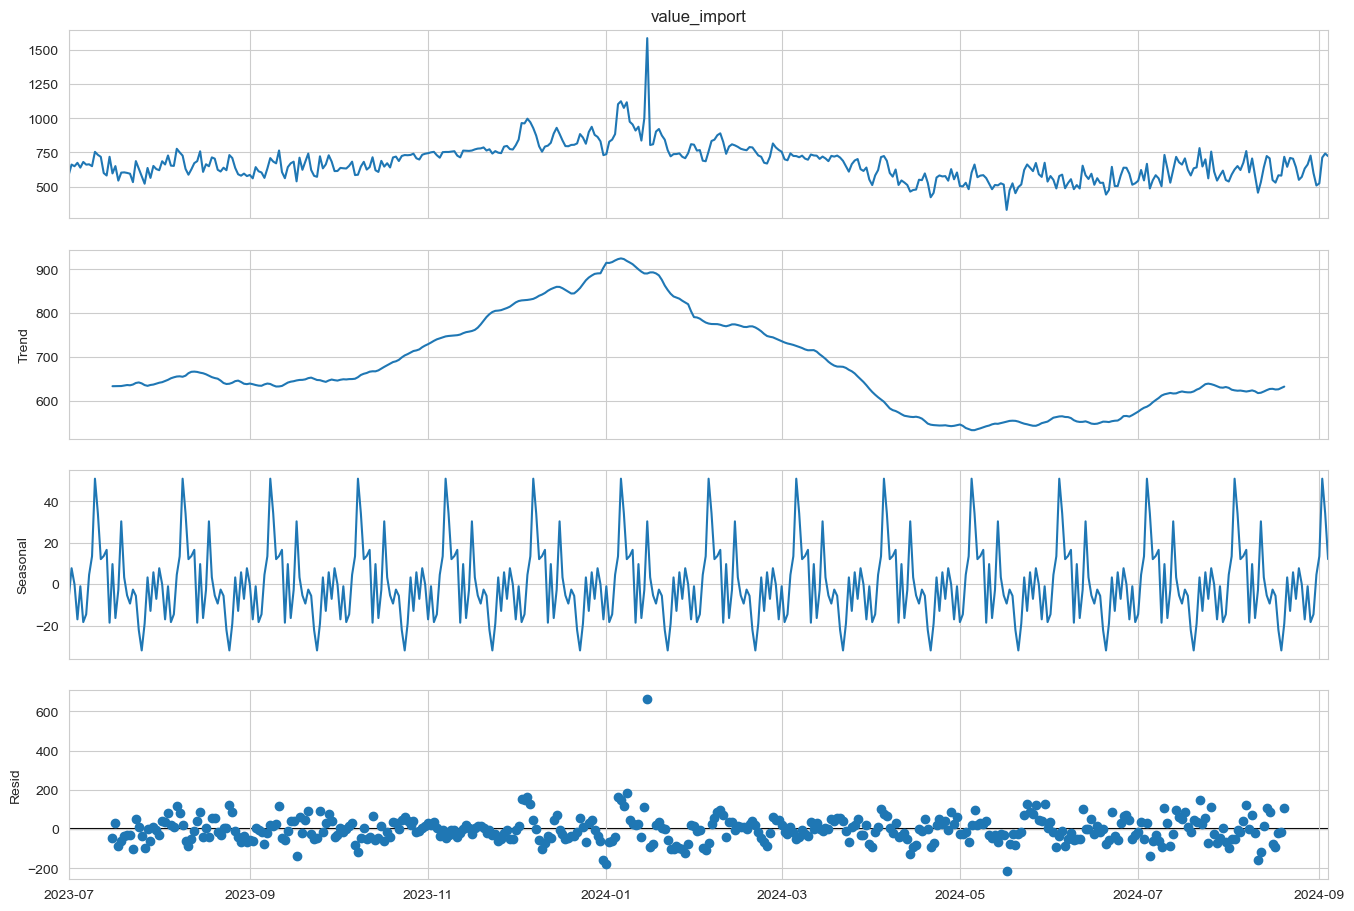

In [295]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
daily_b_anomalies.set_index('timestamp', inplace=True)
decomposition = seasonal_decompose(daily_b_anomalies['value_import'], model='additive', period=30)  # Assuming monthly seasonality
daily_b_anomalies.reset_index(inplace=True)

    
# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()


In [296]:
daily_c_anomalies = pipe.get_daily_consumption(BuilingIdsEnum.C)
daily_c_anomalies['z_score'] = np.abs(stats.zscore(daily_c_anomalies['value_import']))

# Define a threshold, e.g., z-score > 3
threshold = 3
daily_c_anomalies['anomaly_z'] = daily_c_anomalies['z_score'] > threshold

# Number of anomalies
print(f"Number of anomalies detected by Z-Score: {daily_c_anomalies['anomaly_z'].sum()}")



Number of anomalies detected by Z-Score: 0


### Model development and evaluation

In [297]:
# show me the week energy consumption of b and main
main_and_b, cols = pipe.select_and_merge_datasets(cols=['net_consumption'], periode="w")
# trim
main_and_b = main_and_b.iloc[1:-1]

# remove net_consumption_building_a and net_consumption_building_c
# main_and_b.drop(columns=['net_consumption_building_a', 'net_consumption_building_c'], inplace=True)
# cols = [col for col in cols if 'building_a' not in col.column and 'building_c' not in col.column]


plot_energy_usage(main_and_b, cols,
                    titel="Energy Consumption Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [298]:

plot_cols =[
    ColumnParam("value_import", "Energy Import"),
    ColumnParam("net_consumption", "Net Consumption"),
    ColumnParam("predicted_consumption", "Predicted Consumption"),
]
daily_main = pipe.get_weekly_consumption(BuilingIdsEnum.MAIN)
# trim
daily_main = daily_main.iloc[1:-1]
plot_energy_usage(daily_main, plot_cols,
                  titel="Energy Usage actual vs predicted",
                  yaxis_title="Energy [kWh]",
                  tozeroy=True,
                  )

# what is the percent difference between the import and predicted energy consumption in sum

sum_import = daily_main['value_import'].sum()
sum_predicted = daily_main['predicted_consumption'].sum()
percent_diff = (sum_predicted - sum_import) / sum_import * 100
percent_diff = (sum_import- sum_predicted ) / sum_predicted * 100

diff = sum_import / sum_predicted

print(f"Percent difference between import and predicted energy consumption: {percent_diff:.2f}%")

Percent difference between import and predicted energy consumption: -9.21%


## Futher analysis points
- **sum up energy savings:** The energy savings for each building should be calculated and compared to identify the most efficient building.
- **Try to figure out how much money they save:** The energy savings can be converted into monetary savings based on the energy costs to provide a more tangible understanding of the benefits.

- **KPIs for energy efficiency:** Key performance indicators (KPIs) can be established to monitor and evaluate the energy efficiency of each building over time. These KPIs can help identify areas for improvement and track progress towards sustainability goals.

- **Analysis of peak energy consumption:** Identifying peak energy consumption periods can help optimize energy usage and reduce costs. Strategies such as load shifting, demand response, and energy storage can be implemented to manage peak demand effectively.

In [310]:
# 
import_df, column_params = pipe.select_and_merge_datasets(["value_import"], periode="h")

main_net_consumption = pipe.get_data(BuilingIdsEnum.MAIN)
main_net_consumption = main_net_consumption[['timestamp', 'net_consumption']]

# merge the two dataframes
import_df = import_df.merge(main_net_consumption, on='timestamp', how='inner')


import_df.set_index('timestamp', inplace=True)
# Resample and aggregate
monthly_imports = import_df.resample('ME').max()

# can you do avg for solar_consumption column in the resample function?
monthly_imports.reset_index(inplace=True)

# give the column names capital letter for the first letter in each word.
for column in column_params:
    column.name = column.name.title()
    
column_params.append(
    ColumnParam("net_consumption", "Net Consumption")
)

plot_energy_usage(monthly_imports, column_params,
                    titel="Monthly Max Energy Import Comparison per Hour",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=False,
                    )
print([column.name for column in column_params])

# find the difference between the max of net and import energy consumption max for main building
monthly_imports['diff'] = monthly_imports['net_consumption'] - monthly_imports['value_import']
monthly_imports["diff"] = monthly_imports["diff"] * 44
penger_spart = monthly_imports["diff"].sum()
print(f"Total money saved by the main building: {penger_spart:.2f} NOK")


['Main Building', 'Building A', 'Building B', 'Building C', 'Net Consumption']
Total money saved by the main building: 4843.71 NOK


In [300]:
# 
import_df = pipe.get_data(BuilingIdsEnum.MAIN)
import_df = import_df[["timestamp","value_import", "solar_consumption"]]
import_df
import_df.set_index('timestamp', inplace=True)
# Resample and aggregate
monthly_imports = import_df.resample('ME').agg({
    'value_import': 'max',
    'solar_consumption': 'mean'
})
monthly_imports.reset_index(inplace=True)

# can you do avg for solar_consumption column in the resample function?
column_params= [
    ColumnParam("value_import", "peak consumption"),
    ColumnParam("solar_consumption", "solar consumption avg.")
]
plot_energy_usage(monthly_imports, column_params,
                    titel="Monthly Max Energy Import Comparison per Hour",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

# 104kr per month winter and 44kr per month summer tarrif for the avg solar consumption
sats_summmer = 44 
sats_winter = 104
costs = monthly_imports.copy()
costs.reset_index(inplace=True)
for index, row in costs.iterrows():
    costs.at[index, 'solar_consumption'] = row['solar_consumption'] * sats_winter if row['timestamp'].month in [10, 11, 12, 1, 2, 3] else row['solar_consumption'] * sats_summmer
total_cost = costs['solar_consumption'].sum()
print(f"total cost for solar panels: {total_cost:.2f} NOK")


total cost for solar panels: 5476.67 NOK


### Analyse av peaks
Siden det er lite størm produksjon om vinteren er det vansklig å redusere peaks med solenergi. Det er derfor viktig å redusere peaks ved å redusere forbruket. Siden bygningen er sensitiv til temperaturen ute, kan det være lurt å isolere bygningen bedre. Dette er ikke en del av ANEO sine tjenester.

Vi ser at bygning b og main har peak i januar. Dette kan være fordi det er kaldt ute og bygningen bruker mye energi til oppvarming. Bygning A har peak i juli. Dette kan være fordi det er varmt ute og bygningen bruker mye energi til kjøling.

For bygninger som A, med peak i juli, kan det være lurt å installere solcellepaneler for å redusere det maximal energiforbruket. Dette er en fordel ANEO kan tilby.

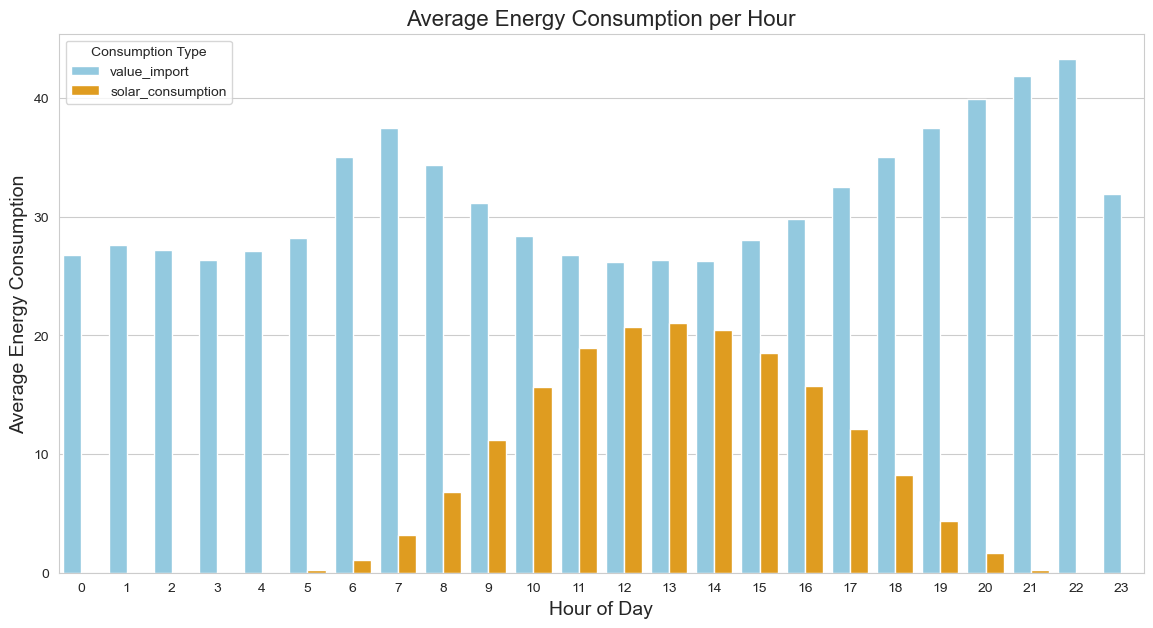

In [301]:
main_hourly = pipe.get_data(BuilingIdsEnum.MAIN)
# jeg vil se på energiforbruekt fordelt på time. Kan jeg ha en søyle for for hver kolonner per time?
# main_hourly = main_hourly[["timestamp","value_import", "solar_consumption", "net_consumption"]] 
main_hourly = main_hourly[["timestamp","value_import", "solar_consumption"]] 
main_hourly.set_index('timestamp', inplace=True)
# jeg ønsker å grupere på time i døgnet og avg for value_import og solar_consumption
main_hourly = main_hourly.groupby(main_hourly.index.hour).mean()
main_hourly.reset_index(inplace=True)
# main_hourly

# Melt the DataFrame to long format for seaborn
main_hourly_melted = main_hourly.melt(id_vars='timestamp', 
                                     value_vars=['value_import', 'solar_consumption'],
                                    #  value_vars=['value_import', 'solar_consumption', "net_consumption"],
                                     var_name='Consumption Type',
                                     value_name='Energy')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='timestamp', y='Energy', hue='Consumption Type', data=main_hourly_melted, palette=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.title('Average Energy Consumption per Hour', fontsize=16)
plt.legend(title='Consumption Type')

plt.show()

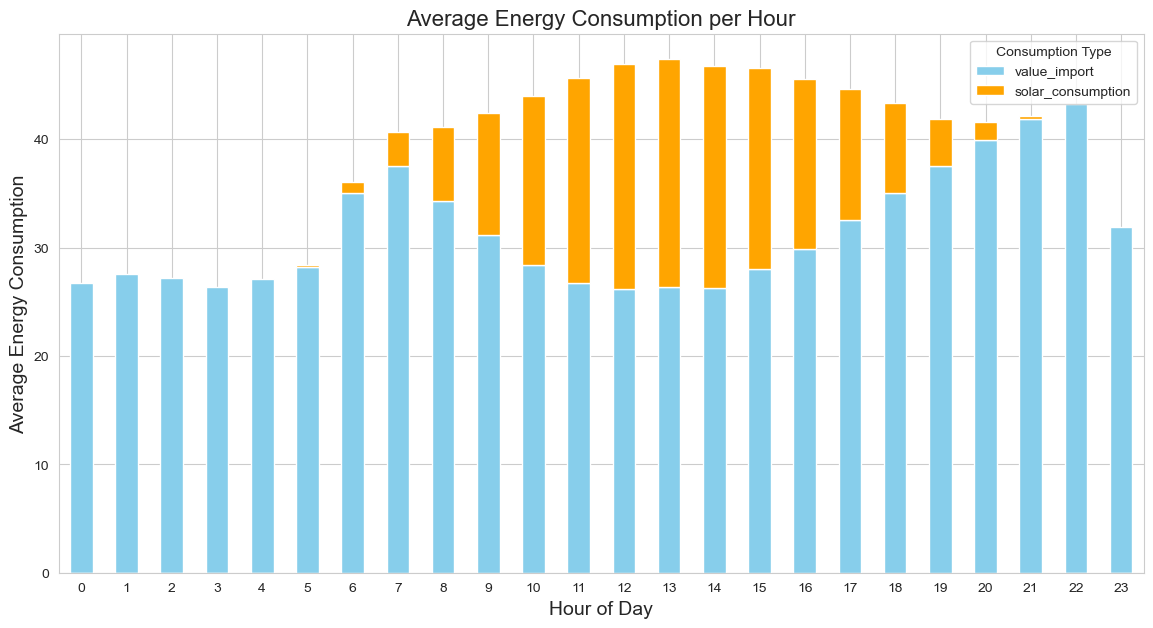

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set 'timestamp' as the index
main_hourly.set_index('timestamp', inplace=True)

# Select the columns you want to plot
energy_data = main_hourly[['value_import', 'solar_consumption']]
main_hourly.reset_index(inplace=True)

# Plot the stacked bar chart
energy_data.plot(kind='bar', 
                stacked=True, 
                figsize=(14, 7), 
                color=['skyblue', 'orange'])


# Add labels and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.title('Average Energy Consumption per Hour', fontsize=16)
plt.legend(title='Consumption Type')

# Optional: Improve x-axis ticks if there are many hours
plt.xticks(rotation=0)

# Show the plot
plt.show()


### Analyse av Peaks
Vi ser det er størt forbruk utenom den tiden på døgnet det er solproduksjon. Trolig vil peak forbruk være på kvelden eller om morningen. Siden det ikke er sol på denne tiden, vil solcellepaneler ikke kunne redusere peak forbruket alene. Imidlertid i kombinasjon med batterier kan reduksjon av peak forbruket være mulig. Imidlertid vil dette trolig kun gi resultater om sommeren. 

- **Videre analyse** se på hvor mye solcell kan redusere peaks i sommermånedene.


In [303]:
#  show the net consumption and the per sqare meter consumption for the main building

consumption_all, cols1 = pipe.select_and_merge_datasets(cols=['net_consumption'], periode="w")
sqr_consumption_all, cols2 = pipe.select_and_merge_datasets(cols=[ 'net_consumption_per_sqm'], periode="w")

# trim
consumption_all = consumption_all.iloc[1:-1]
sqr_consumption_all = sqr_consumption_all.iloc[1:-1]


# plot
plot_energy_usage(consumption_all, cols1,
                    titel="Net Consumption",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )
plot_energy_usage(sqr_consumption_all, cols2,
                    titel="Net Consumption per Square Meter",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

# print avg consumption per sqare meter for all buildings
avg_sqr_consumption = sqr_consumption_all.mean()
avg_sqr_consumption


net_consumption_per_sqm               5.391458
net_consumption_per_sqm_building_a    4.797652
net_consumption_per_sqm_building_b    4.328114
net_consumption_per_sqm_building_c    5.222163
dtype: float64

In [304]:
net_consumption_per_sqm   =            5.391458
net_consumption_per_sqm_building_a =   4.797652
net_consumption_per_sqm_building_b  =  4.328114
net_consumption_per_sqm_building_c =   5.222163

part_a = net_consumption_per_sqm_building_a / net_consumption_per_sqm
part_b = net_consumption_per_sqm_building_b / net_consumption_per_sqm
part_a, part_b

(0.8898617034575805, 0.8027724596945761)

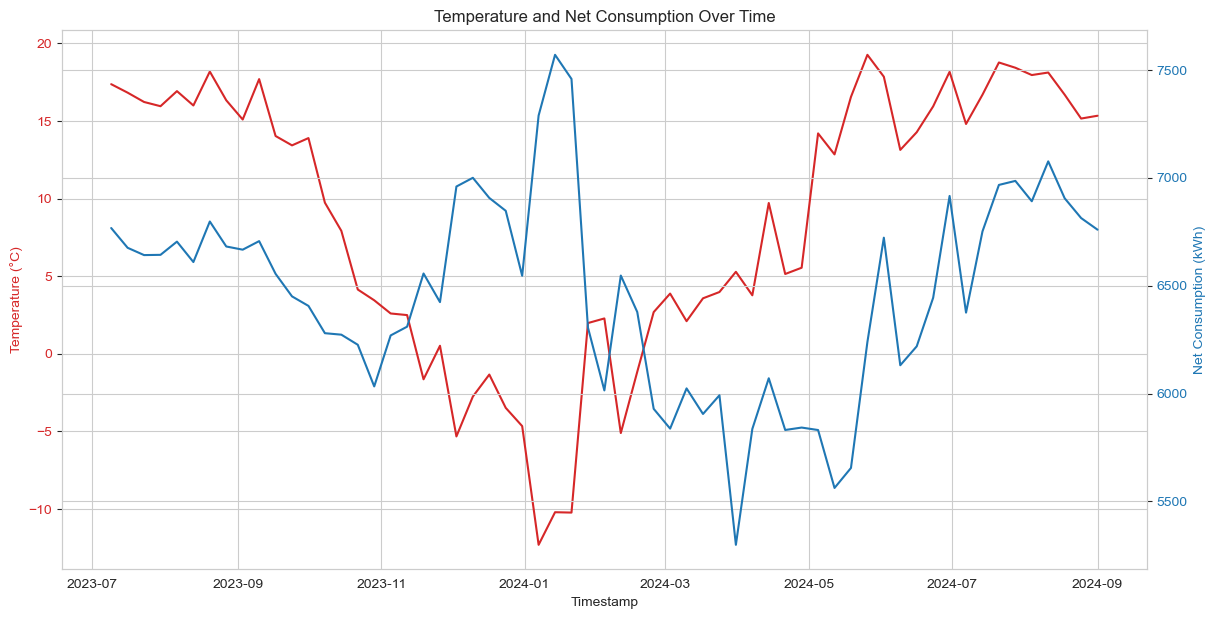

In [305]:
# can you plot the temperature and the net consumption for the main building
main_df = pipe.get_data(BuilingIdsEnum.MAIN)

# Select the relevant columns
main_temp = main_df[['timestamp', 'temperature']]
main_consumption = main_df[['timestamp', 'net_consumption']]
# Set 'timestamp' as the index
main_temp.set_index('timestamp', inplace=True)
main_consumption.set_index('timestamp', inplace=True)

# resample to weekly
main_temp = main_temp.resample('W').mean()
main_consumption = main_consumption.resample('W').sum()
# trim 
main_temp = main_temp.iloc[1:-1]
main_consumption = main_consumption.iloc[1:-1]


# Plot the temperature and net consumption on the same plot

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the temperature
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(main_temp.index, main_temp['temperature'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for net consumption
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Net Consumption (kWh)', color=color)
ax2.plot(main_consumption.index, main_consumption['net_consumption'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and labels
plt.title('Temperature and Net Consumption Over Time')
plt.show()

In [306]:
#  show the net consumption and the per sqare meter consumption for the main building

consumption_all, cols = pipe.select_and_merge_datasets(cols=['value_import', "area"], periode="w")
consumption_all
# sqr_consumption_all, cols2 = pipe.select_and_merge_datasets(cols=[ 'net_consumption_per_sqm'], periode="w")

# add import per sqare meter
# consumption_all["value_import_per_sqm"] = consumption_all["value_import"] / consumption_all["area"]

new_cols = [
    
]

for i, col in enumerate(cols):
    if  "value_import" in col.column:
        col_name = col.column
        building_letter = col.column.split("_")[-1]
        area_col_name = cols[i+1].column
        area  = consumption_all[area_col_name].iloc[0]
        consumption_all[f"value_import_per_sqm_{building_letter}"] = consumption_all[col_name] / area
        
        new_cols.append(
            ColumnParam(f"value_import_per_sqm_{building_letter}", f"Value Import per sqm {building_letter}")
        )
        
consumption_all


# trim
consumption_all = consumption_all.iloc[1:-1]


# # plot
plot_energy_usage(consumption_all, new_cols,
                    titel="Net Consumption and Net Consumption per Square Meter",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=False,
                    )


# print avg consumption per sqare meter for all buildings
avg_sqr_consumption = consumption_all.mean()
avg_sqr_consumption


value_import                   5289.121148
area                           1199.000000
value_import_building_a        5598.860000
area_building_a                1167.000000
value_import_building_b        4739.284918
area_building_b                1095.000000
value_import_building_c        7227.473607
area_building_c                1384.000000
value_import_per_sqm_import       4.411277
value_import_per_sqm_a            4.797652
value_import_per_sqm_b            4.328114
value_import_per_sqm_c            5.222163
dtype: float64

In [307]:
#  show the net consumption and the per sqare meter consumption for the main building

consumption_all, cols = pipe.select_and_merge_datasets(cols=["net_consumption"], periode="h")
consumption_all

# sqr_consumption_all, cols2 = pipe.select_and_merge_datasets(cols=[ 'net_consumption_per_sqm'], periode="w")
avg_sqr_consumption = consumption_all.mean()
avg_sqr_consumption


timestamp                     2024-02-01 10:59:59.999999744
net_consumption                                   38.474969
net_consumption_building_a                        33.301582
net_consumption_building_b                        28.209438
net_consumption_building_c                        43.016706
dtype: object